<a href="https://colab.research.google.com/github/thiunuwan/Autism-Prediction/blob/main/Autism_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Autism Prediction Using Machine Learning**

In this project, we will predict the presence of Autism Spectrum Disorder (ASD) using machine learning algorithms such as Decision Tree, Random Forest, and XGBoost etc. We will also perform hyperparameter tuning to optimize model performance and evaluate the results based on various metrics.

colab link : https://colab.research.google.com/drive/1cYc49xOiV0OO0tbxsyODtwSIlNeReuTT?usp=sharing

##**Section 1:Introduction**




###**1.1 Problem Statement**
Autism Spectrum Disorder (ASD) encompasses a range of neurodevelopmental conditions characterized by challenges in social interaction, communication, and behavior. Early and accurate detection of ASD is vital for implementing timely interventions that can significantly enhance the quality of life for individuals affected. This project aims to develop a predictive model capable of assessing the likelihood of an individual being on the autism spectrum based on various demographic and behavioral attributes.

###**1.2 Objective**
The primary objective of this study is to construct a machine learning model that can predict the probability of an individual having ASD. By analyzing features such as age, gender, and responses to behavioral assessments.

###**1.3 Dataset Overview**
Features:
- ID - ID of the patient
- A1_Score to A10_Score - Score based on Autism Spectrum Quotient (AQ) 10 item screening tool
- age - Age of the patient in years
- gender - Gender of the patient
- ethnicity - Ethnicity of the patient
- jaundice - Whether the patient had jaundice at the time of birth
- autism - Whether an immediate family member has been diagnosed with autism
- contry_of_res - Country of residence of the patient
- used_app_before - Whether the patient has undergone a screening test before
- result - Score for AQ1-10 screening test
- age_desc - Age of the patient
- relation - Relation of patient who completed the test
- Class/ASD - Classified result as 0 or 1. Here 0 represents No and 1 represents Yes. This is the target column, and during submission submit the values as 0 or 1 only.


##**Section 2:Importing Libraries**

In this section, we will import the required libraries for data manipulation, model training, and evaluation.


In [ ]:
# install catboost
!pip install -q catboost

In [ ]:
# Data Manipulation and Analysis
import pandas as pd
import numpy as np

# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import missingno as msno

# Machine Learning Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score

# Evaluation Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Handling Imbalanced Data
from imblearn.over_sampling import SMOTE

# Classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

from scipy.stats import chi2_contingency
import scipy.stats as stats

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

##**Section 3:Data Loading and Basic  Exploration**

Here we load the dataset, check for missing values, and visualize its basic properties to understand the structure and relationships in the data.

**Fetch or Load the Dataset**

In [ ]:
#read the csv data to a pandas dataframe
df = pd.read_csv("/content/train.csv");

In [ ]:
df.shape

(800, 22)

**Display Basic Dataset Information**


In [ ]:
# display all columns of a dataframe
pd.set_option('display.max_columns', None)
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38.172746,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47.750517,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7.380373,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,0,23.561927,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,0,43.205790,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [ ]:
# convert age column datatype to integer
df["age"] = df["age"].astype(int)

**Summary Statistics**

In [ ]:
df.describe()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.0000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,27.963750,8.537303,0.201250
std,231.0844,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.329827,4.807676,0.401185
min,1.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-6.137748,0.000000
25%,200.7500,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,5.306575,0.000000
50%,400.5000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.000000,9.605299,0.000000
75%,600.2500,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.250000,12.514484,0.000000
max,800.0000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,15.853126,1.000000


**Identify Missing Values**

In [ ]:
# Count missing values in each column:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 ID                 0
A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jaundice           0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64


**Identify Duplicates**

> Add blockquote



In [ ]:
#Check for duplicate entries:
print("Duplicates:", df.duplicated().sum())

Duplicates: 0


**Identify Unique Values**

In [ ]:
print(df.nunique())

ID                 800
A1_Score             2
A2_Score             2
A3_Score             2
A4_Score             2
A5_Score             2
A6_Score             2
A7_Score             2
A8_Score             2
A9_Score             2
A10_Score            2
age                 79
gender               2
ethnicity           12
jaundice             2
austim               2
contry_of_res       56
used_app_before      2
result             800
age_desc             1
relation             6
Class/ASD            2
dtype: int64


In [ ]:
# List of numerical features to exclude
numerical_features = ["ID", "age", "result"]

# Header for the table
print("\n{:<20} {}".format("Column", "Unique Values"))
print("=" * 50)

# Loop through DataFrame columns
for col in df.columns:
    if col not in numerical_features:
        # Get all unique values
        unique_values = df[col].unique()
        unique_values_str = ", ".join(map(str, unique_values))

        # Wrap the text if it's too long
        print(f"{col:<20}", end="")
        print(f"{unique_values_str:<60}")
        print("-" * 50)


Column               Unique Values
A1_Score            1, 0                                                        
--------------------------------------------------
A2_Score            0, 1                                                        
--------------------------------------------------
A3_Score            1, 0                                                        
--------------------------------------------------
A4_Score            0, 1                                                        
--------------------------------------------------
A5_Score            1, 0                                                        
--------------------------------------------------
A6_Score            0, 1                                                        
--------------------------------------------------
A7_Score            1, 0                                                        
--------------------------------------------------
A8_Score            0, 1                

**insights**

- identified that the columns ethnicity and relation contain the value "?", indicating potential missing or ambiguous data.
- age_desc has only one unique val.

In [ ]:
# Display the unique values and their counts
unique_values_counts = df['ethnicity'].value_counts()
print(unique_values_counts)
print("\n")

# Display the unique values and their counts
unique_values_counts = df['relation'].value_counts()
print(unique_values_counts)

ethnicity
White-European     257
?                  203
Middle Eastern      97
Asian               67
Black               47
South Asian         34
Pasifika            32
Others              29
Latino              17
Hispanic             9
Turkish              5
others               3
Name: count, dtype: int64


relation
Self                        709
?                            40
Parent                       29
Relative                     18
Others                        2
Health care professional      2
Name: count, dtype: int64


**Insights**

- **Since age_desc is constant (18 and more), it doesn't provide any additional information.**
  - Action: Drop the age_desc column as it's irrelevant for analysis.

- **Missing or Ambiguous Values** : Variables like ethnicity and relation contain unclear values (?). These could affect downstream analysis if not handled.
  - For ethnicity: Replace ? with "Unknown"
    - Reasoning: The ? in ethnicity likely means the respondent did not disclose their ethnicity. By replacing it with "Unknown," we keep it distinct from the existing "others" category, which represents rare or undefined ethnicities. This approach retains the meaning of the data without mixing unrelated categories.
    - For ethnicity, the ? values represent about 25% of the total, which is quite significant. In this case, replacing with the mode might not be the best option because it could introduce bias, especially if the unknown category is substantial.A better approach might be to replace ? with Unknown.

  - For relation: Merge ? with "others"
    - For relation, the ? values make up only 5% of the total, which is relatively small. Replacing the ? with the mode (Self) would be a reasonable approach in this case.



In [ ]:
 # dropping ID & age_desc column
df = df.drop(columns=["ID", "age_desc"])

In [ ]:
df.shape

(800, 20)

In [ ]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

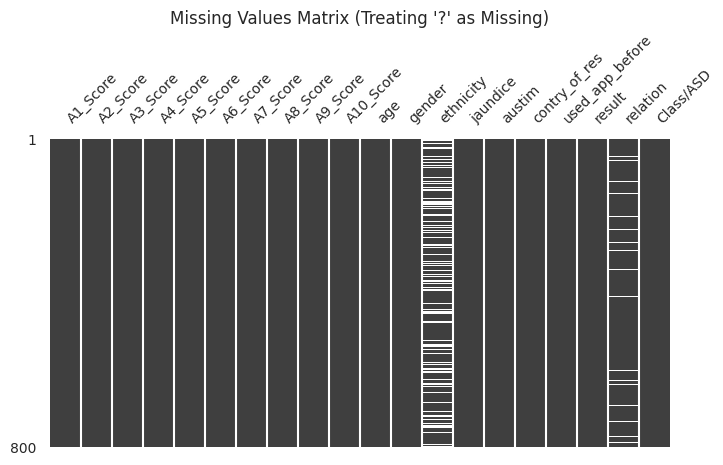

In [ ]:
# Replace "?" with NaN using df.replace, and treat it as missing without modifying the original DataFrame
fig, ax = plt.subplots(figsize=(8, 4))
msno.matrix(df.replace("?", np.nan), ax=ax, sparkline=False)
plt.title("Missing Values Matrix (Treating '?' as Missing)", fontsize=12)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
plt.show()


In [ ]:
# Replace '?' in 'ethnicity' column with 'Unknown'  ( Since '?' represents about 25% of the total data )
df['ethnicity'] = df['ethnicity'].replace('?', 'Unknown')

# Display the updated 'ethnicity' column to check the changes
print(df['ethnicity'].value_counts())

ethnicity
White-European     257
Unknown            203
Middle Eastern      97
Asian               67
Black               47
South Asian         34
Pasifika            32
Others              29
Latino              17
Hispanic             9
Turkish              5
others               3
Name: count, dtype: int64


In [ ]:
# Replace '?' in 'relation' column with the mode ('Self')  (Since '?' represents only 5% of the total data in 'relation')
most_frequent_relation = df['relation'].mode()[0]
df['relation'] = df['relation'].replace('?', most_frequent_relation)

# Display the updated 'relation' column to check the changes
print(df['relation'].value_counts())

relation
Self                        749
Parent                       29
Relative                     18
Others                        2
Health care professional      2
Name: count, dtype: int64


In [ ]:
# define the mapping dictionary for country names
mapping = {
    "AmericanSamoa": "United States",
    "Hong Kong": "China"
}

# repalce value in the country column
df["contry_of_res"] = df["contry_of_res"].replace(mapping)

In [ ]:
df["contry_of_res"].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Viet Nam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'Bahamas', 'Saudi Arabia', 'Ireland', 'Aruba',
       'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan', 'Armenia',
       'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'China', 'Angola',
       'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran', 'Argentina',
       'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone', 'Czech Republic',
       'Niger', 'Romania', 'Cyprus', 'Belgium', 'Burundi', 'Bangladesh'],
      dtype=object)

**Taget class distribution**


In [ ]:
# taget class distribution
print(df["Class/ASD"].value_counts())

Class/ASD
0    639
1    161
Name: count, dtype: int64


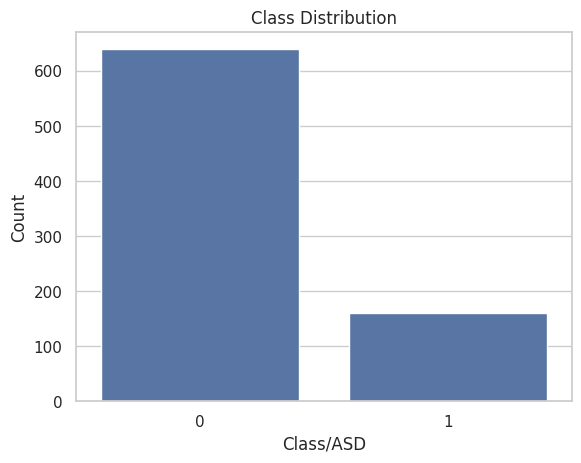

In [ ]:
# Plot the class distribution
sns.countplot(x='Class/ASD', data=df)
plt.title('Class Distribution')
plt.xlabel('Class/ASD')
plt.ylabel('Count')
plt.show()


**Insights:**
- identified class imbalance in the target column

## **Section4 : EDA**

In [ ]:
categorical_cols = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
                    'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender', 'jaundice', 'austim',
                    'used_app_before', 'relation']
num_cols=['age','result']

In [ ]:
# Descriptive statistics for numerical columns
df[num_cols].describe()

,age,result
count,800.000000,800.000000
mean,27.963750,8.537303
std,16.329827,4.807676
min,2.000000,-6.137748
25%,17.000000,5.306575
50%,24.000000,9.605299
75%,35.250000,12.514484
max,89.000000,15.853126


**Insights**

- Columns - A1_Score to A10_Score has value either 0 or 1, to be considered as binary variable
- Age starts from min 2 yrs to max 89 yrs with median value in 24.8 yrs and average value in 28.45 yrs
- Result value ranges from -6.13 to +15.85

#### **Univariate Analysis**

**Numerical Features:**
- age
- result

Here we Use histograms, box plots, and density plots to understand the distribution of each numerical feature.

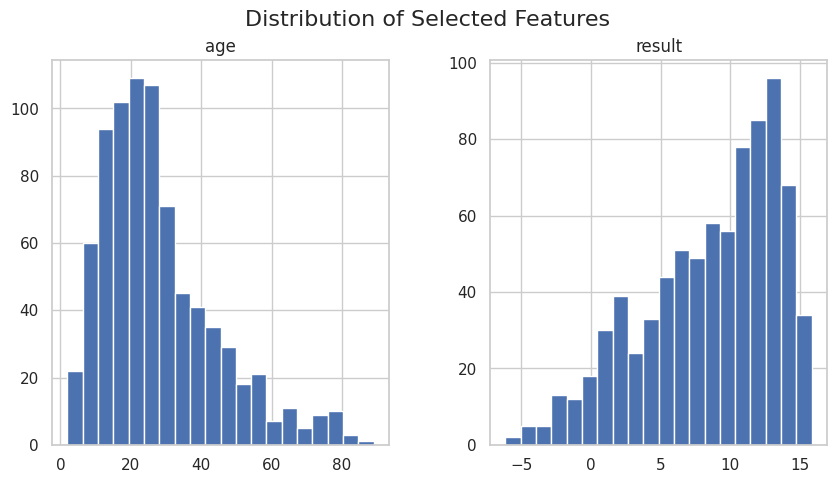

In [ ]:
features_to_plot = ["age", "result"]

# Create histograms for the selected features
df[features_to_plot].hist(figsize=(10, 5), bins=20)  # Adjust bins as needed
plt.suptitle("Distribution of Selected Features", fontsize=16)
plt.show()


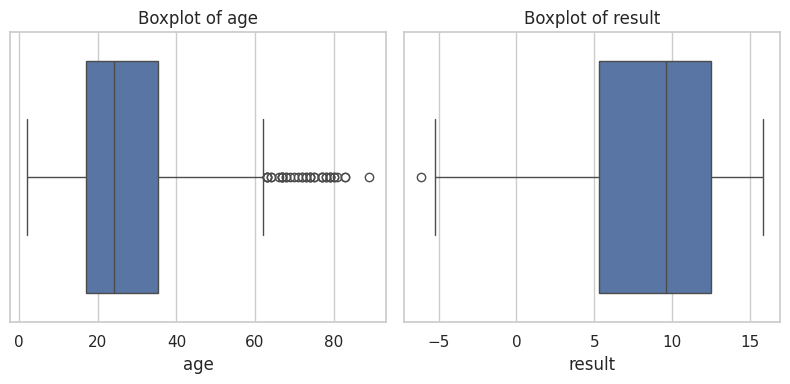

In [ ]:
# List of numerical columns you want to plot
numeric_cols = ['age', 'result']

# Set the figure size
plt.figure(figsize=(12, 4))

# Calculate the number of rows and columns for the subplots
num_plots = len(numeric_cols)
num_cols = 3  # Since you have 3 numerical columns
num_rows = (num_plots // num_cols) + (1 if num_plots % num_cols != 0 else 0)

# Plot boxplots dynamically based on the number of features
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")

# Adjust layout
plt.tight_layout()
plt.show()


**Categorical Features:**

 visualized the frequency distribution of categorical features by creating count plots for each categorical column in the dataset

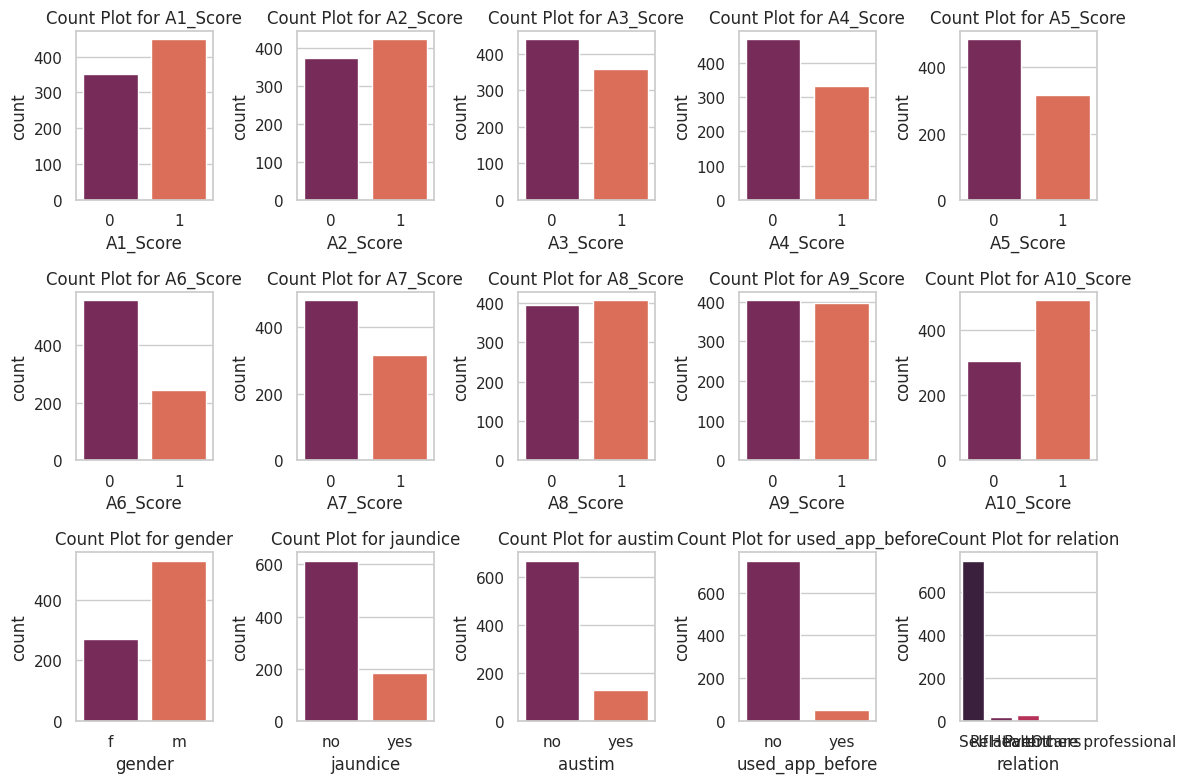

In [ ]:
# List of categorical columns
categorical_cols = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
                    'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender', 'jaundice', 'austim',
                    'used_app_before', 'relation']

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Visualize the frequency distribution of categorical features
plt.figure(figsize=(12, 8))
plotnumber = 1

for column in categorical_cols:
    if plotnumber <= len(categorical_cols):
        ax = plt.subplot(3, 5, plotnumber)
        sns.countplot(x=column, data=df, hue=column, palette='rocket', legend=False)
        plt.xlabel(column)
        plt.title(f"Count Plot for {column}")
        plotnumber += 1

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


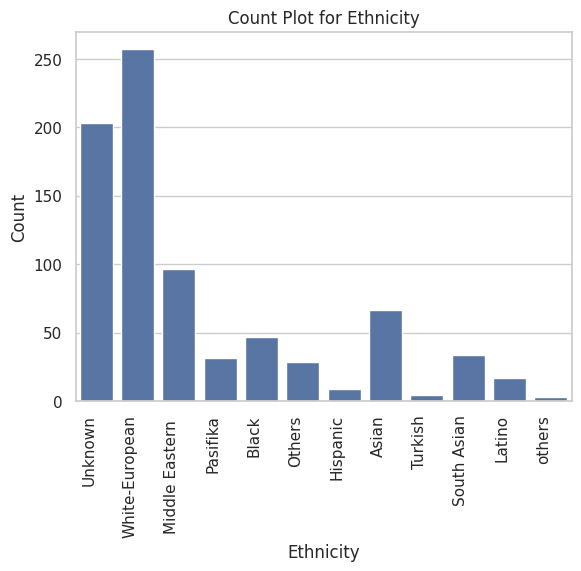

In [ ]:
# Create the countplot
sns.countplot(x=df["ethnicity"])
plt.title("Count Plot for Ethnicity")
plt.xlabel("Ethnicity")
plt.ylabel("Count")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, ha='right')  # Rotate labels by 45 degrees and align them to the right

plt.show()

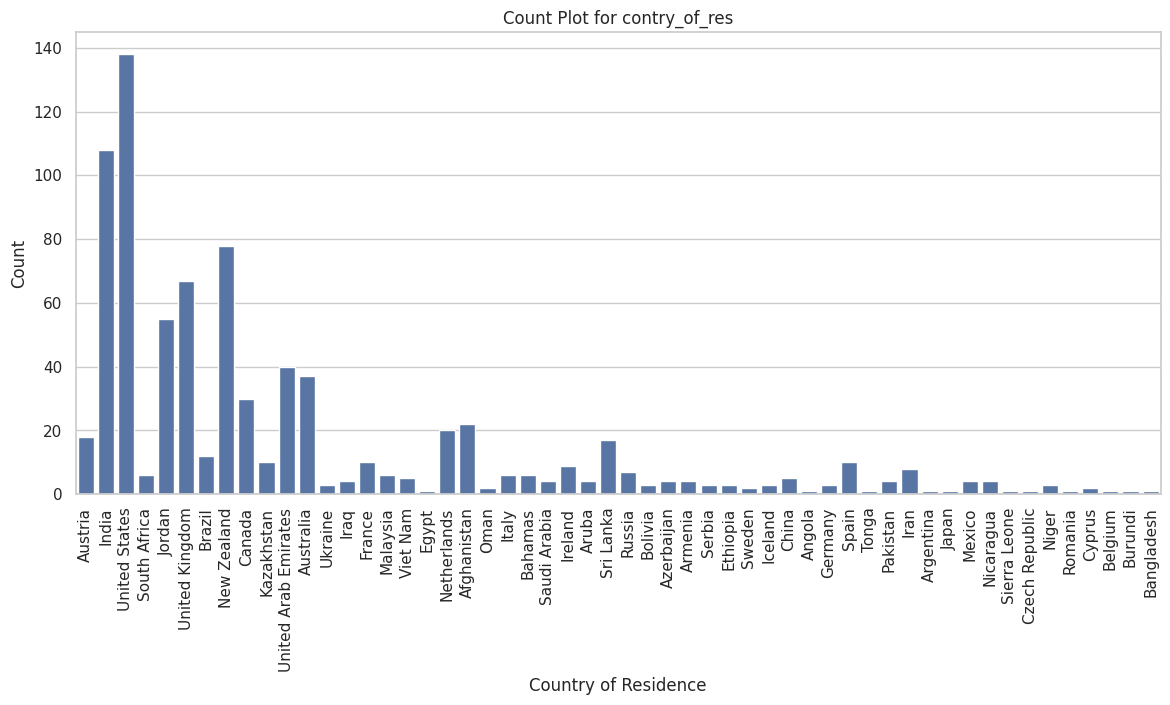

In [ ]:
# Set figure size to provide more space
plt.figure(figsize=(14, 6))  # Adjust the width (12) to widen the space

# Create the countplot
sns.countplot(x=df["contry_of_res"])
plt.title("Count Plot for contry_of_res")
plt.xlabel("Country of Residence")
plt.ylabel("Count")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, ha='center')  # Rotate labels by 90 degrees and align them to the center

plt.show()


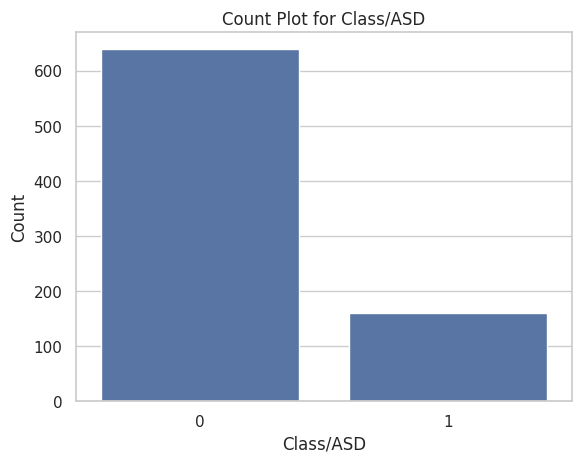

In [ ]:
# countplot for target column (Class/ASD)
sns.countplot(x=df["Class/ASD"])
plt.title("Count Plot for Class/ASD")
plt.xlabel("Class/ASD")
plt.ylabel("Count")
plt.show()

####**Bivariate analysis**

Created stacked bar plots to visualize the relationship between each categorical feature and the target variable (Class/ASD), displaying frequencies

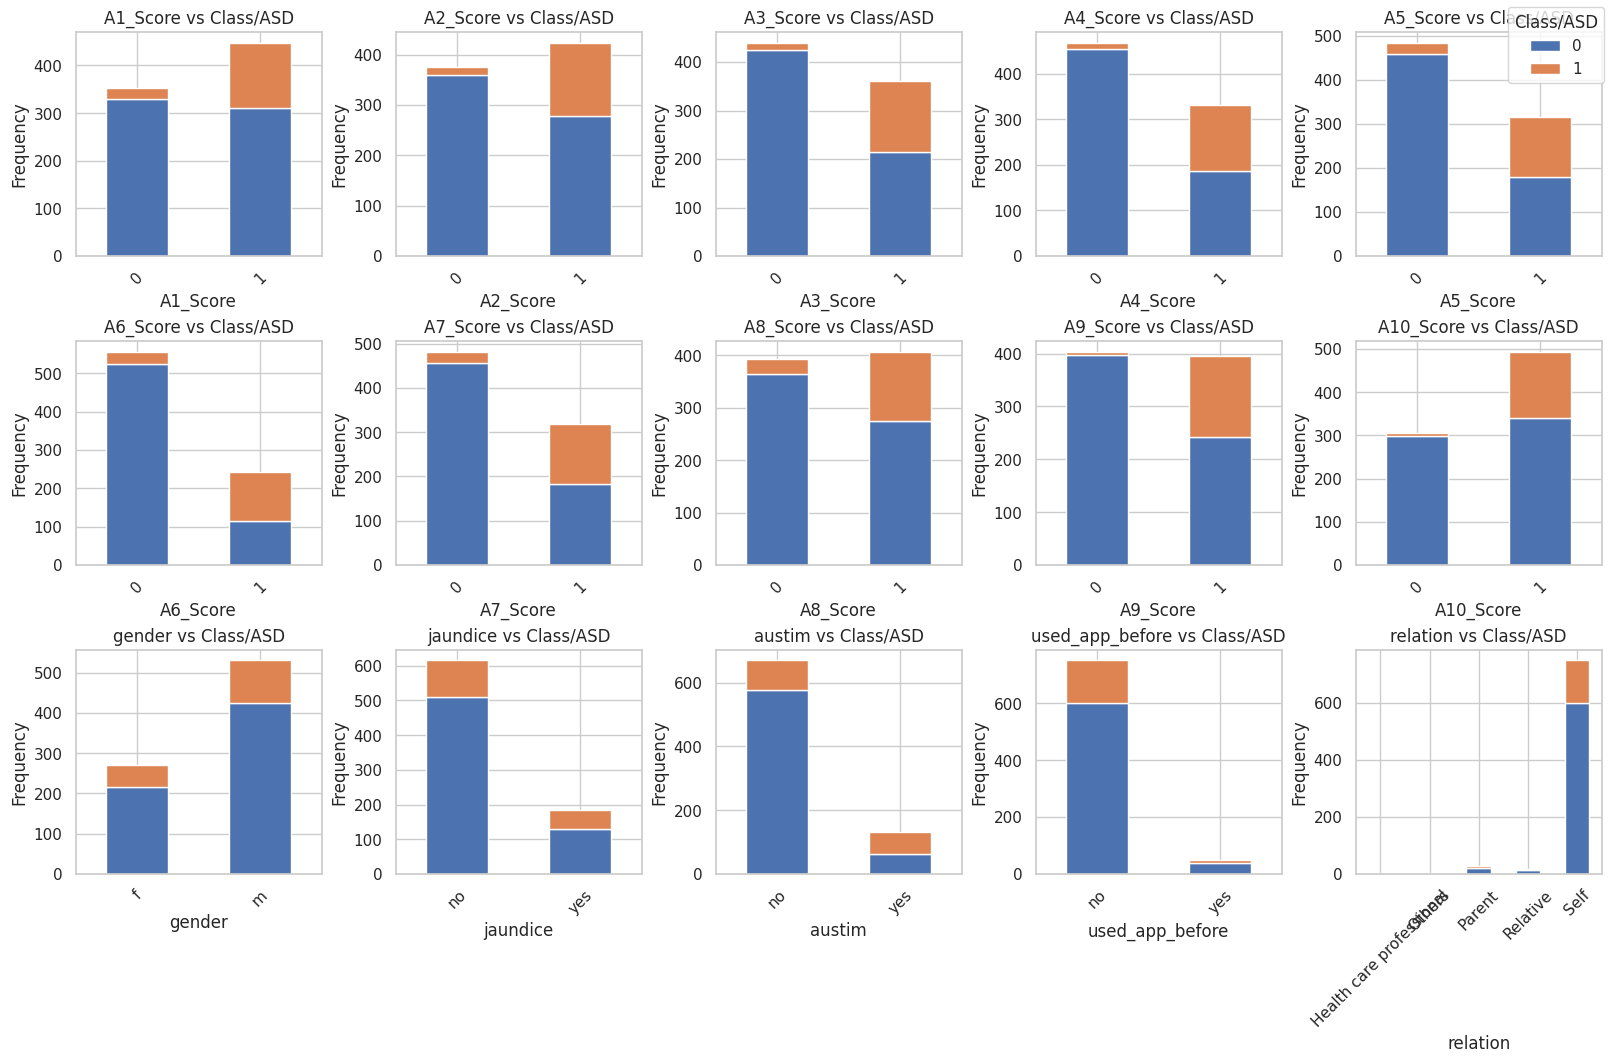

In [ ]:
# List of categorical features
categorical_cols = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
                    'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender', 'jaundice', 'austim',
                    'used_app_before', 'relation']

# Assuming 'target' is your target variable
target = 'Class/ASD'

num_cols = 5
num_rows = 5

# Create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, num_rows * 3), constrained_layout=True)

# Flatten the axes for easy iteration
axes = axes.flatten()

# Iterate through each categorical feature and create a stacked bar plot
for i, cat in enumerate(categorical_cols):
    ax = axes[i]  # Select the subplot
    df_ct = pd.crosstab(df[cat], df[target])  # Cross-tabulation
    df_ct.plot(kind='bar', stacked=True, ax=ax, legend=False)  # Stacked bar plot
    ax.set_title(f'{cat} vs {target}')
    ax.set_xlabel(cat)
    ax.set_ylabel('Frequency')
    ax.tick_params(axis='x', rotation=45)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Add a single legend for the entire figure
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', title=target)

plt.show()


##**Section 5: Data Preprocessing**
In this step, we clean the data by handling missing values and encoding categorical variables. We also split the data into features and target variables, and scale the features if necessary.


**Handle Outliers**

In [ ]:
# count the outliers using IQR method
Q1_age = df["age"].quantile(0.25)
Q3_age = df["age"].quantile(0.75)
IQR = Q3_age - Q1_age
lower_bound_age = Q1_age - 1.5 * IQR
upper_bound_age = Q3_age + 1.5 * IQR
age_outliers = df[(df["age"] < lower_bound_age) | (df["age"] > upper_bound_age)]
len(age_outliers)

39

In [ ]:
# count the outliers using IQR method
Q1_result = df["result"].quantile(0.25)
Q3_result = df["result"].quantile(0.75)
IQR = Q3_result - Q1_result
lower_bound_result = Q1_result - 1.5 * IQR
upper_bound_result = Q3_result + 1.5 * IQR
result_outliers = df[(df["result"] < lower_bound_result) | (df["result"] > upper_bound_result)]
len(result_outliers)

1

In [ ]:
# Capping the outliers in both columns at once
df["age"] = df["age"].clip(lower=lower_bound_age, upper=upper_bound_age)
df["result"] = df["result"].clip(lower=lower_bound_result, upper=upper_bound_result)

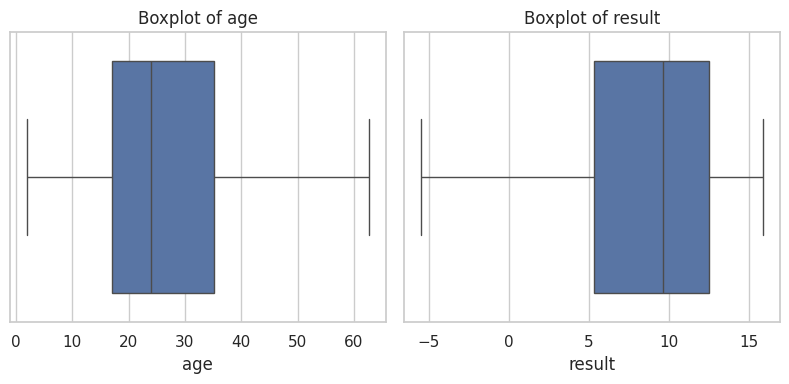

In [ ]:
numeric_cols = ['age', 'result']

# Set the figure size
plt.figure(figsize=(12, 4))

# Calculate the number of rows and columns for the subplots
num_plots = len(numeric_cols)
num_cols = 3  # Since you have 3 numerical columns
num_rows = (num_plots // num_cols) + (1 if num_plots % num_cols != 0 else 0)

# Plot boxplots dynamically based on the number of features
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")

# Adjust layout
plt.tight_layout()
plt.show()


**Handle Missing values**

We handle missing values during the Basic Exploration phase.

**Chi-Square Test of Independence Between Categorical Features and Target Variable**

performs a Chi-square test of independence between categorical features and the target variable (Class/ASD) to evaluate if there's a significant relationship between them. Calculate p-value and the result, determining whether the variables are dependent or independent based on a significance level of 0.05.

In [ ]:
# Function to conduct chi square test between categorical feature and target feature
cat_cols = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
                    'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender', 'jaundice', 'austim',
                    'used_app_before', 'relation']
def chi_sq_test(ct):
    # input crosstab of 2 categorical variables
    stat, p, dof, expected = chi2_contingency(ct)

    # interpret p-value
    alpha = 0.05
    print("p value is " + str(p))
    if p <= alpha:
        print('Both variables are Dependent (reject H0)')
    else:
        print('Both variables are Independent (H0 holds true)\n')


# Function to perform chi-square test between categorical feature and target variable (no plotting)
def cat_col_test(df, cat_colname, target_colname):
    print(f"Column name - {cat_colname}")
    ct = pd.crosstab(df[cat_colname], df[target_colname])
    chi_sq_test(ct)

# Run chi-square test on each categorical column
for c in cat_cols:
    cat_col_test(df, c, 'Class/ASD')


Column name - A1_Score
p value is 4.104487536920418e-17
Both variables are Dependent (reject H0)
Column name - A2_Score
p value is 1.3998012922364413e-25
Both variables are Dependent (reject H0)
Column name - A3_Score
p value is 2.4007562062687566e-38
Both variables are Dependent (reject H0)
Column name - A4_Score
p value is 4.8840206399536454e-45
Both variables are Dependent (reject H0)
Column name - A5_Score
p value is 1.7931000962761736e-38
Both variables are Dependent (reject H0)
Column name - A6_Score
p value is 1.3536803601031668e-52
Both variables are Dependent (reject H0)
Column name - A7_Score
p value is 5.621312869749746e-37
Both variables are Dependent (reject H0)
Column name - A8_Score
p value is 2.181610421234002e-18
Both variables are Dependent (reject H0)
Column name - A9_Score
p value is 9.762852300543611e-39
Both variables are Dependent (reject H0)
Column name - A10_Score
p value is 5.880205552224773e-22
Both variables are Dependent (reject H0)
Column name - gender
p v

**Insights**

- Retain Dependent Features: Focus on the dependent features (A1_Score to A10_Score, jaundice, and austim) as they are more likely to help in predicting the target variable.
- Potential Removal of Independent Features: You may remove or further analyze the independent features (gender, used_app_before, relation), as they don’t seem to contribute to the prediction of the target.

In [ ]:
# List of independent features (p-value > 0.05)
independent_features = [''gender', 'used_app_before', 'relation]

# Remove the independent features from the DataFrame
df = df.drop(columns=independent_features)

# Display the cleaned DataFrame
print(df.head())


   A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0         1         0         1         0         1         0         1   
1         0         0         0         0         0         0         0   
2         1         1         1         1         1         1         1   
3         0         0         0         0         0         0         0   
4         0         0         0         0         0         0         0   

   A8_Score  A9_Score  A10_Score   age       ethnicity jaundice austim  \
0         0         1          1  38.0         Unknown       no     no   
1         0         0          0  47.0         Unknown       no     no   
2         1         1          1   7.0  White-European       no    yes   
3         0         0          0  23.0         Unknown       no     no   
4         0         0          0  43.0         Unknown       no     no   

   contry_of_res     result  Class/ASD  
0        Austria   6.351166          0  
1          India   2.2

**Anova Test of Independence Between Numerical Features and Target Variable**

 Perform an ANOVA (Analysis of Variance) test to check if there's a significant difference in the means of a continuous feature across different categories of the target variable (e.g., Class/ASD)

In [ ]:
# Function to perform ANOVA for all numeric features
def check_dependence(df, target_colname, numeric_cols, alpha=0.05):
    significant_features = []
    for col in numeric_cols:
        # Perform ANOVA for each numerical feature with respect to the categorical target
        groups = [df[df[target_colname] == category][col] for category in df[target_colname].unique()]
        stat, p_value = stats.f_oneway(*groups)

        # Interpret the p-value and store significant features
        print(f"p-value for {col}: {p_value}")
        if p_value <= alpha:
            significant_features.append(col)
            print(f"{col} is dependent on {target_colname} (reject H0)\n")
        else:
            print(f"{col} is independent of {target_colname} (H0 holds true)\n")

    return significant_features

# Example usage:
numeric_cols = ['age','result']
significant_features = check_dependence(df, 'Class/ASD', numeric_cols)


p-value for age: 0.0018933823367749422
age is dependent on Class/ASD (reject H0)

p-value for result: 9.52946261968497e-25
result is dependent on Class/ASD (reject H0)



**Encoing Categorical Variables**

The features "jaundice" and "austim" are binary categorical variables with values "yes" and "no." Before encoding, these variables will be mapped to a binary format, where "yes" is represented as 1 and "no" as 0. This transformation ensures compatibility with machine learning models that require numerical inputs

In [ ]:
# encoding for categorical variables with only 2 unique values
df['jaundice'] = np.where(df['jaundice'] == 'yes',1,0)
print(df['jaundice'].value_counts())

jaundice
0    615
1    185
Name: count, dtype: int64


In [ ]:
# encoding for categorical variables with only 2 unique values
df['austim'] = np.where(df['austim'] == 'yes',1,0)
print(df['austim'].value_counts())

austim
0    669
1    131
Name: count, dtype: int64


The "ethnicity" feature is a categorical variable with multiple unique values. Label encoding assigns a unique integer to each category based on its frequency in the dataset. By using the value_counts() method, we first identify the unique categories and their respective frequencies, and then assign an integer to each category in a way that reflects their frequency. This encoding helps convert categorical data into a numerical format that can be used by machine learning models, allowing the model to capture patterns associated with each category.

In [ ]:
# Label encoding based on frequency values of categorical variable
dict_ethnicity = dict(zip(df['ethnicity'].value_counts().index, range(1,df['ethnicity'].nunique()+1)))
dict_ethnicity

{'White-European': 1,
 'Unknown': 2,
 'Middle Eastern ': 3,
 'Asian': 4,
 'Black': 5,
 'South Asian': 6,
 'Pasifika': 7,
 'Others': 8,
 'Latino': 9,
 'Hispanic': 10,
 'Turkish': 11,
 'others': 12}

In [ ]:
df['ethnicity'] = df['ethnicity'].map(dict_ethnicity)
# Check the value counts in the 'ethnicity' column
# print(df['ethnicity'].value_counts())

 Following step groups the less frequent countries in the 'contry_of_res' column into an 'Other' category. This simplifies the encoding process by reducing the number of unique categories, ensuring more efficient handling of categorical data.

In [ ]:
# Calculate the frequency of each country in the 'contry_of_res' column
country_freq = df['contry_of_res'].value_counts()

# Select the top 16 countries based on frequency (the countries with the highest occurrence)
top_16_countries = country_freq.head(16).index

# Replace countries not in the top 16 with 'Other'
df['contry_of_res'] = df['contry_of_res'].apply(lambda x: x if x in top_16_countries else 'Other')

# Verify the changes
print(df['contry_of_res'].value_counts())


contry_of_res
United States           138
Other                   128
India                   108
New Zealand              78
United Kingdom           67
Jordan                   55
United Arab Emirates     40
Australia                37
Canada                   30
Afghanistan              22
Netherlands              20
Austria                  18
Sri Lanka                17
Brazil                   12
France                   10
Kazakhstan               10
Spain                    10
Name: count, dtype: int64


In [ ]:
dict_country = dict(zip(df['contry_of_res'].value_counts().index, range(1,df['contry_of_res'].nunique()+1)))

In [ ]:
df['contry_of_res'] = df['contry_of_res'].map(dict_country)
print(df['contry_of_res'].value_counts())

contry_of_res
1     138
2     128
3     108
4      78
5      67
6      55
7      40
8      37
9      30
10     22
11     20
12     18
13     17
14     12
15     10
16     10
17     10
Name: count, dtype: int64


**Train Test Split**


In [ ]:
X = df.drop(columns=["Class/ASD"])
y = df["Class/ASD"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(y_train.shape)
print(y_test.shape)

(640,)
(160,)


In [ ]:
print(y_train.value_counts())

Class/ASD
0    515
1    125
Name: count, dtype: int64


To address class imbalance, where one class has significantly more samples than the other, we can use Resampling Techniques

- Oversampling the Minority Class (SMOTE - Synthetic Minority Over-sampling Technique): We create synthetic samples for the minority class to balance the class distribution.
- Undersampling the Majority Class: We randomly remove samples from the majority class to balance the class distribution.

We typically prefer SMOTE as it generates synthetic data points for the minority class rather than removing existing samples, which can lead to a loss of valuable information.

**SMOTE**

SMOTE (Synthetic Minority Over-sampling Technique) is a technique used to address class imbalance by creating synthetic samples for the minority class. Instead of simply duplicating existing samples, SMOTE generates new, artificial examples that are combinations of existing data points.



In [ ]:
smote = SMOTE(random_state=42)

In [ ]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print(y_train_smote.shape)

(1030,)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [ ]:
print(y_train_smote.value_counts())

Class/ASD
1    515
0    515
Name: count, dtype: int64


##**Section 6: Model Training**

In this section, we will train three models: Decision Tree, Random Forest, and XGBoost. We will evaluate them using accuracy and classification report to establish a baseline performance.


In [ ]:
cat_cols2 = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
                    'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'jaundice', 'austim','ethnicity','contry_of_res']

In [ ]:
# Dictionary of classifiers
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
    "CatBoost-2": CatBoostClassifier(verbose=0, random_state=42,cat_features=cat_cols2),
    "SVM": SVC(probability=True, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Extra Trees": ExtraTreesClassifier(random_state=42)
}


In [ ]:
# dictionary to store the cross validation results
cv_scores = {}
# perform 5-fold cross validation for each model
for model_name, model in models.items():
  print(f"Training {model_name} with default parameters...")
  scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring="accuracy")
  cv_scores[model_name] = scores
  print(f"{model_name} Cross-Validation Accuracy: {np.mean(scores):.4f}")
  print("-"*50)

Training Decision Tree with default parameters...
Decision Tree Cross-Validation Accuracy: 0.8699
--------------------------------------------------
Training Random Forest with default parameters...
Random Forest Cross-Validation Accuracy: 0.9155
--------------------------------------------------
Training CatBoost with default parameters...
CatBoost Cross-Validation Accuracy: 0.9146
--------------------------------------------------
Training CatBoost-2 with default parameters...
CatBoost-2 Cross-Validation Accuracy: 0.9000
--------------------------------------------------
Training SVM with default parameters...
SVM Cross-Validation Accuracy: 0.7981
--------------------------------------------------
Training K-Nearest Neighbors with default parameters...
K-Nearest Neighbors Cross-Validation Accuracy: 0.8505
--------------------------------------------------
Training Naive Bayes with default parameters...
Naive Bayes Cross-Validation Accuracy: 0.8214
------------------------------------

In [ ]:
cv_scores

{'Decision Tree': array([0.82524272, 0.89805825, 0.87864078, 0.88349515, 0.86407767]),
 'Random Forest': array([0.90291262, 0.94174757, 0.9223301 , 0.90291262, 0.90776699]),
 'CatBoost': array([0.88834951, 0.94660194, 0.93203883, 0.89805825, 0.90776699]),
 'CatBoost-2': array([0.88834951, 0.9223301 , 0.90291262, 0.89320388, 0.89320388]),
 'SVM': array([0.7961165 , 0.7961165 , 0.80097087, 0.82524272, 0.77184466]),
 'K-Nearest Neighbors': array([0.86407767, 0.85436893, 0.86893204, 0.83009709, 0.83495146]),
 'Naive Bayes': array([0.86407767, 0.83495146, 0.80582524, 0.83495146, 0.76699029]),
 'Extra Trees': array([0.91262136, 0.95145631, 0.92718447, 0.91262136, 0.90291262])}

##Model Evaluation and Comparison

In [ ]:
# Dictionary to store test results
test_scores = {}

# Train each model on the full training set and evaluate on the test set
for model_name, model in models.items():
    model.fit(X_train_smote, y_train_smote)  # Train the model
    y_test_pred = model.predict(X_test)     # Predict on test data

    # Calculate accuracy on the test set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_scores[model_name] = test_accuracy

    # Print test accuracy
    print(f"\n{model_name} Test Accuracy: {test_accuracy:.4f}")

    # Print Confusion Matrix
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_test_pred)
    print(cm)

    # Print Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_test_pred))
    print("=" * 50)


Decision Tree Test Accuracy: 0.8187

Confusion Matrix:
[[107  17]
 [ 12  24]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       124
           1       0.59      0.67      0.62        36

    accuracy                           0.82       160
   macro avg       0.74      0.76      0.75       160
weighted avg       0.83      0.82      0.82       160


Random Forest Test Accuracy: 0.8438

Confusion Matrix:
[[109  15]
 [ 10  26]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       124
           1       0.63      0.72      0.68        36

    accuracy                           0.84       160
   macro avg       0.78      0.80      0.79       160
weighted avg       0.85      0.84      0.85       160


CatBoost Test Accuracy: 0.8562

Confusion Matrix:
[[110  14]
 [  9  27]]

Classification Report:
              precision    recall  f1-scor

| **Model**               | **Accuracy** | **Precision (Class 1)** | **Recall (Class 1)** |  
|-------------------------|--------------|-------------------------|----------------------|  
| **Decision Tree**        | 0.8187       | 0.59                    | 0.67                 |  
| **Random Forest**        | 0.8438       | 0.63                    | 0.72                 |  
| **CatBoost**             | 0.8562       | 0.66                    | 0.75                 |  
| **CatBoost-2**           | 0.8500       | 0.63                    | 0.81                 |  
| **SVM**                  | 0.7750       | 0.50                    | 0.78                 |  
| **K-Nearest Neighbors**  | 0.7438       | 0.45                    | 0.69                 |  
| **Naive Bayes**          | 0.8313       | 0.58                    | 0.92                 |  
| **Extra Trees**          | 0.8625       | 0.68                    | 0.72                 |  


Key Takeaways:
- Best Performing Models: CatBoost (0.8562) and Extra Trees (0.8625) show the highest accuracy and most balanced confusion matrices, with fewer misclassifications overall.
- Challenges with SVM and KNN: Both SVM (0.7750) and KNN (0.7438) have lower accuracy and struggle more with misclassifying the positive class.


##**Hyperparameter Tuning**

Here, we will perform hyperparameter tuning for each model using `GridSearchCV` to find the optimal parameters and improve model performance.


In [ ]:
# Initializing models
random_forest = RandomForestClassifier(random_state=42)
catboost_classifier = CatBoostClassifier(random_state=42, verbose=0)  # Set verbose=0 to suppress CatBoost logs
extra_trees_classifier = ExtraTreesClassifier(random_state=42)

In [ ]:
param_grid_rf = {
    "n_estimators": [10,50, 100, 200],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}

param_grid_catboost = {
    "iterations": [100, 200, 500],
    "depth": [6, 8, 10],
    "learning_rate": [0.01, 0.05, 0.1],
    "l2_leaf_reg": [1, 3, 5],
    "border_count": [32, 50, 100],
    "thread_count": [4, 8, 16],
}

param_grid_extra_trees = {
    "n_estimators": [50, 100, 200, 500],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False],
    "criterion": ["gini", "entropy"]
}

In [ ]:
# Perform RandomizedSearchCV for each model
random_search_rf = RandomizedSearchCV(estimator=random_forest, param_distributions=param_grid_rf, n_iter=20, cv=5, scoring="accuracy",random_state=42)
random_search_catboost = RandomizedSearchCV(estimator=catboost_classifier, param_distributions=param_grid_catboost, n_iter=20, cv=5, scoring="accuracy", random_state=42)
random_search_extra_trees = RandomizedSearchCV(estimator=extra_trees_classifier, param_distributions=param_grid_extra_trees, n_iter=20, cv=5, scoring="accuracy", random_state=42)

# Fit the models
random_search_rf.fit(X_train_smote, y_train_smote)
random_search_catboost.fit(X_train_smote, y_train_smote)
random_search_extra_trees.fit(X_train_smote, y_train_smote)

# Retrieve the best models from each search
best_rf = random_search_rf.best_estimator_
best_catboost = random_search_catboost.best_estimator_
best_extra_trees = random_search_extra_trees.best_estimator_

# You can print or save the best models and their respective scores if needed

print(f"Best Random Forest: {best_rf}")
print(f"Best Score: {random_search_rf.best_score_}")
print(f"Best CatBoost: {best_catboost}")
print(f"Best Score: {random_search_catboost.best_score_}")
print(f"Best Extra Trees: {best_extra_trees}")
print(f"Best Score: {random_search_extra_trees.best_score_}")


Best Random Forest: RandomForestClassifier(bootstrap=False, max_depth=20, min_samples_split=5,
                       random_state=42)
Best Score: 0.925242718446602
Best CatBoost: <catboost.core.CatBoostClassifier object at 0x7ce7fee78c40>
Best Score: 0.925242718446602
Best Extra Trees: ExtraTreesClassifier(max_depth=30, min_samples_split=5, n_estimators=50,
                     random_state=42)
Best Score: 0.921359223300971


In [ ]:
# # Perform GridSearchCV for each model
# grid_search_rf = GridSearchCV(estimator=random_forest, param_grid=param_grid_rf, cv=5, scoring="accuracy", n_jobs=-1)
# grid_search_catboost = GridSearchCV(estimator=catboost_classifier, param_grid=param_grid_catboost, cv=5, scoring="accuracy", n_jobs=-1)
# grid_search_extra_trees = GridSearchCV(estimator=extra_trees_classifier, param_grid=param_grid_extra_trees, cv=5, scoring="accuracy", n_jobs=-1)

# # Fit the models
# grid_search_rf.fit(X_train_smote, y_train_smote)
# grid_search_catboost.fit(X_train_smote, y_train_smote)
# grid_search_extra_trees.fit(X_train_smote, y_train_smote)

# # Retrieve the best models from each search
# best_rf = grid_search_rf.best_estimator_
# best_catboost = grid_search_catboost.best_estimator_
# best_extra_trees = grid_search_extra_trees.best_estimator_

# # print best models and their respective scores if needed

# print(f"Best Random Forest: {best_rf}")
# print(f"Best Score: {grid_search_rf.best_score_}")
# print(f"Best CatBoost: {best_catboost}")
# print(f"Best Score: {grid_search_catboost.best_score_}")
# print(f"Best Extra Trees: {best_extra_trees}")
# print(f"Best Score: {grid_search_extra_trees.best_score_}")

##Model Evaluation and Comparison (after Hyperparameter Tuning)

In [ ]:
# Function to evaluate a model on the test data
def evaluate_on_test(model, X_test, y_test, model_name):
    print(f"---------------- {model_name} ---------------------")
    y_test_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Test Accuracy: {accuracy:.4f}")
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_test_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_test_pred))
    print("\n")

# Evaluate Random Forest
evaluate_on_test(best_rf, X_test, y_test, "Random Forest")

# Evaluate CatBoost
evaluate_on_test(best_catboost, X_test, y_test, "CatBoost")

# Evaluate Extra Trees
evaluate_on_test(best_extra_trees, X_test, y_test, "Extra Trees")


---------------- Random Forest ---------------------
Test Accuracy: 0.8438

Confusion Matrix:
[[110  14]
 [ 11  25]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       124
           1       0.64      0.69      0.67        36

    accuracy                           0.84       160
   macro avg       0.78      0.79      0.78       160
weighted avg       0.85      0.84      0.85       160



---------------- CatBoost ---------------------
Test Accuracy: 0.8688

Confusion Matrix:
[[112  12]
 [  9  27]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.90      0.91       124
           1       0.69      0.75      0.72        36

    accuracy                           0.87       160
   macro avg       0.81      0.83      0.82       160
weighted avg       0.87      0.87      0.87       160



---------------- Extra Trees ---------------------
Test Accuracy:

| **Model**       | **Accuracy** | **Precision (Class 1)** | **Recall (Class 1)** |  
|-----------------|--------------|-------------------------|----------------------|  
| **Random Forest** | 0.8438       | 0.64                    | 0.69                 |  
| **CatBoost**     | 0.8688       | 0.69                    | 0.75                 |  
| **Extra Trees**  | 0.8750       | 0.70                    | 0.78                 |  


Summary :
- Best Overall Model: Extra Trees , providing the best balance across all metrics.
- Improved Performance: CatBoost also shows significant improvement with strong recall for Class 1

##**Ensemble Learning..cont**

### **Voting Classifier**

In this section, we will use an ensemble approach with a **Voting Classifier**, combining the predictions of multiple models (Extra Trees, Random Forest, and CatBoost)

In [ ]:
# Creating the voting classifier
voting_clf = VotingClassifier(
    estimators=[
        ('rf', best_rf),
        ('cat', best_catboost),
        ('extraTree', best_extra_trees)
    ],
    voting='soft'
)


**Why These Models?**

* Diversity in Learning:

  - Extra Trees and Random Forest are tree-based models, but Extra Trees introduces more randomness in splitting decisions, potentially making them more diverse.
CatBoost is a boosting method that focuses on iterative improvement of weak models, offering a different approach than bagging methods like Random Forest and Extra Trees.
* Accuracy:

  - Extra Trees, Random Forest, and CatBoost offer the best performance with very close cross-validation accuracies, meaning they are strong individually and can complement each other in an ensemble.

**Voting Strategy:**

Soft Voting is the better approach since all of these models provide probability predictions, and soft voting will take these into account for improved accuracy.

Voting Classifier Accuracy on Test Data: 0.86875

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.90      0.91       124
           1       0.69      0.75      0.72        36

    accuracy                           0.87       160
   macro avg       0.81      0.83      0.82       160
weighted avg       0.87      0.87      0.87       160


Confusion Matrix:
[[112  12]
 [  9  27]]


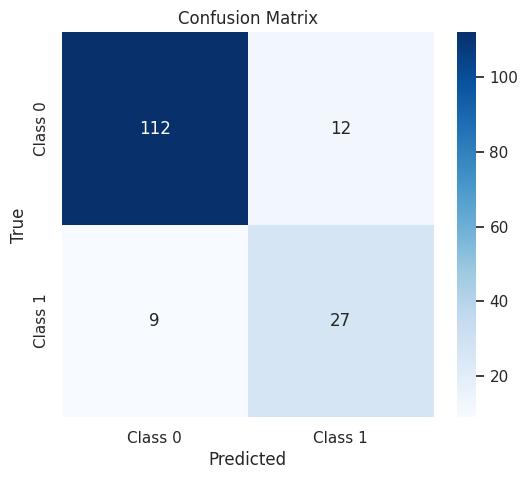

In [ ]:
# Train the voting classifier
voting_clf.fit(X_train_smote, y_train_smote)

# Predict on test data
y_test_pred = voting_clf.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_test_pred)
print("Voting Classifier Accuracy on Test Data:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

# Display confusion matrix and classification report
print("\nConfusion Matrix:")
cm=confusion_matrix(y_test, y_test_pred)
print(cm)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

 ### **Stacking Classifier**

In this section, we will use an ensemble approach with a **Stacking Classifier**, which combines the predictions of multiple base models (Random Forest and Gradient Boosting) and uses a meta-model (Random Forest) to make the final prediction

In [ ]:
# Define base models
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)

# Define stacking classifier
stack = StackingClassifier(
    estimators=[('rf', rf), ('gb', gb)],  # Base models
    final_estimator=RandomForestClassifier(random_state=42)  # Meta-model
)

Stacking Classifier training Accuracy: 0.9971
Stacking Classifier Test Accuracy: 0.8938

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       124
           1       0.76      0.78      0.77        36

    accuracy                           0.89       160
   macro avg       0.85      0.85      0.85       160
weighted avg       0.89      0.89      0.89       160


Confusion Matrix:
[[115   9]
 [  8  28]]


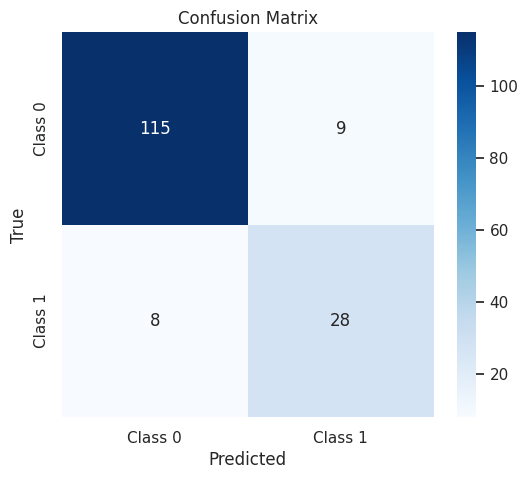

In [ ]:
# Train the stacking classifier
stack.fit(X_train_smote, y_train_smote)

##########################
# Evaluate on the test set
y_pred_stack_train = stack.predict(X_train_smote)
accuracy = accuracy_score( y_train_smote, y_pred_stack_train)
print(f"Stacking Classifier training Accuracy: {accuracy:.4f}")

##########################
# Evaluate on the test set
y_pred_stack = stack.predict(X_test)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred_stack)
print(f"Stacking Classifier Test Accuracy: {accuracy:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_stack))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_stack)
print("\nConfusion Matrix:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


### **Conclusion**

Based on the provided performance metrics, the Stacking Classifier appears to be the most suitable model for this problem. Here’s the reasoning:

1. Highest Accuracy
The Stacking Classifier achieved the highest test accuracy of 89.38%, outperforming all other models, indicating better overall prediction performance.
2. Balanced Performance (Macro Avg)
The macro average f1-score for the Stacking Classifier is 0.85, reflecting a good balance between precision and recall for both classes. This is crucial, especially for datasets with class imbalance (e.g., ASD detection).
3. Better Recall for the Minority Class
For Class 1 (ASD detection), the recall of the Stacking Classifier is 0.78, which is higher than Random Forest (0.64), CatBoost (0.75), and Extra Trees (0.78). A high recall is vital because identifying true positives is more critical in ASD prediction.
4. Precision is Maintained
While improving recall, the Stacking Classifier maintains a precision of 0.76 for Class 1, indicating fewer false positives relative to CatBoost and Extra Trees.
5. Low False Negatives
The confusion matrix for the Stacking Classifier shows only 8 false negatives, which is the lowest among all models. Minimizing false negatives is essential to reduce the risk of missed ASD cases.

**Justification**:

The Stacking Classifier combines the strengths of multiple models, leading to improved generalization and superior performance.
It provides the most reliable results for critical metrics like recall and macro-average f1-score, making it suitable for a sensitive task like ASD detection.


In [ ]:
# END - - -

**Next Steps to Improve Performance:**

Focusing on Recall: Prioritize recall for Class 1 to minimize missed autism cases.